## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_merge_df

In [27]:
# Checking the number of mice.
total_mice = len(mouse_merge_df["Mouse ID"].value_counts())

mouse_count =pd.DataFrame({"Number of Mice": [total_mice]})
mouse_count

,Number of Mice
0,249


In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merge_df.drop_duplicates(subset=['Mouse ID'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [31]:
# Checking the number of mice in the clean DataFrame.
mouse_count =pd.DataFrame({"Number of Mice": [total_mice]})
mouse_count

,Number of Mice
0,249


## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_group = mouse_merge_df.groupby(["Drug Regimen"])
summary_statistics_df =  pd.DataFrame({"Mean": round(drug_regimen_group["Tumor Volume (mm3)"].mean(),2),
                                      "Median": round(drug_regimen_group["Tumor Volume (mm3)"].median(),2),
                                      "Variance": round(drug_regimen_group["Tumor Volume (mm3)"].var(),2),
                                      "SEM": round(drug_regimen_group["Tumor Volume (mm3)"].sem(),2)
                                     })

summary_statistics_df

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.68,41.56,24.95,0.33
Ceftamin,52.59,51.78,39.29,0.47
Infubinol,52.88,51.82,43.13,0.49
Ketapril,55.24,53.70,68.55,0.60
Naftisol,54.33,52.51,66.17,0.60
Placebo,54.03,52.29,61.17,0.58
Propriva,52.32,50.85,42.35,0.51
Ramicane,40.22,40.67,23.49,0.32
Stelasyn,54.23,52.43,59.45,0.57


In [45]:
# Using the aggregation method, produce the same summary statistics in a single line
hello = drug_regimen_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "sem"])

## Bar and Pie Charts

In [42]:
drug_regimen_["Tumor Volume (mm3)"].agg([ "count" ])

,count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


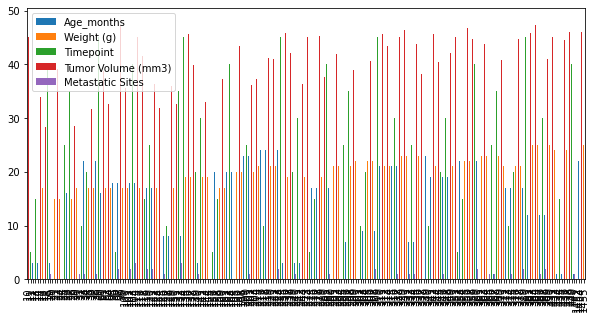

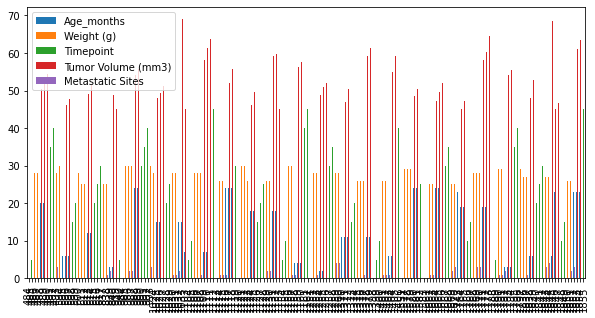

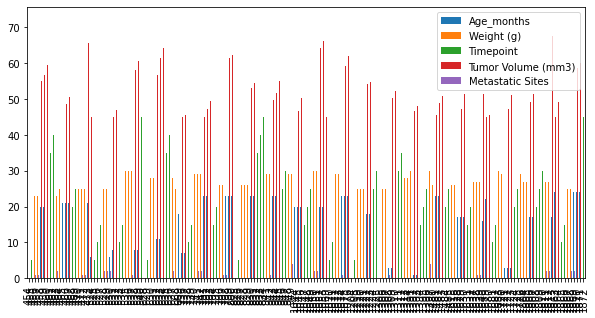

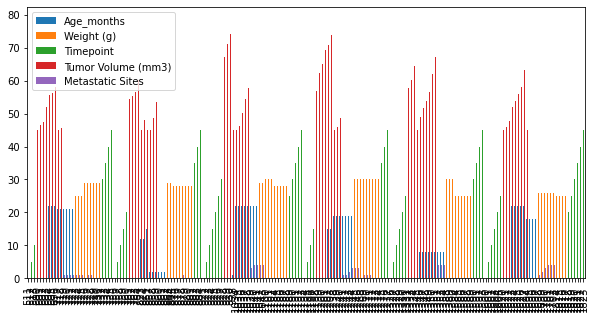

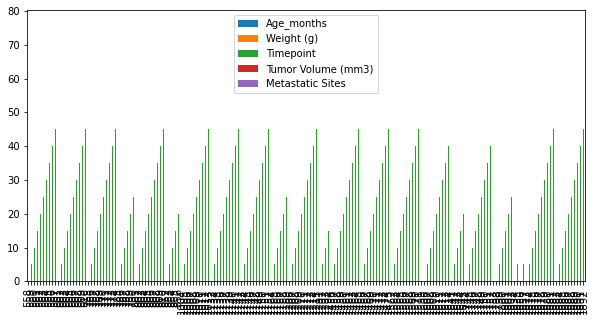

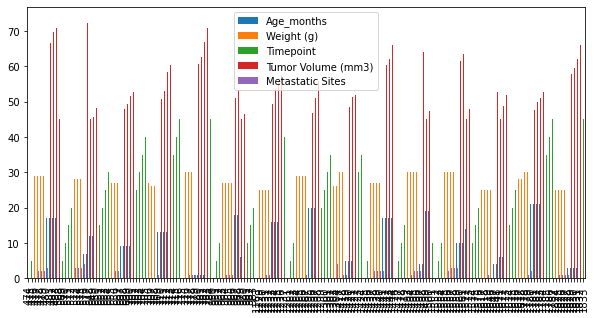

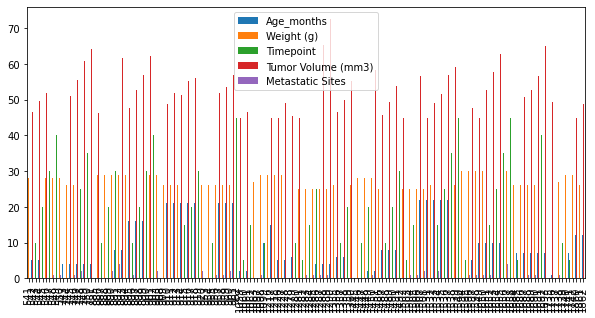

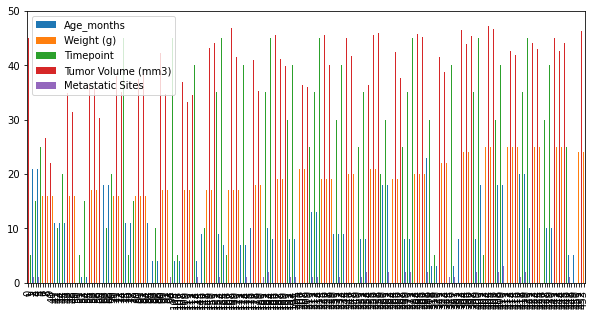

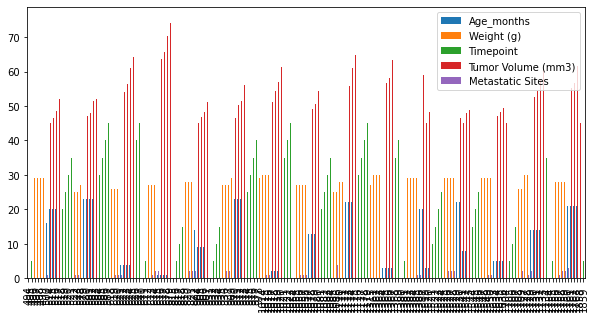

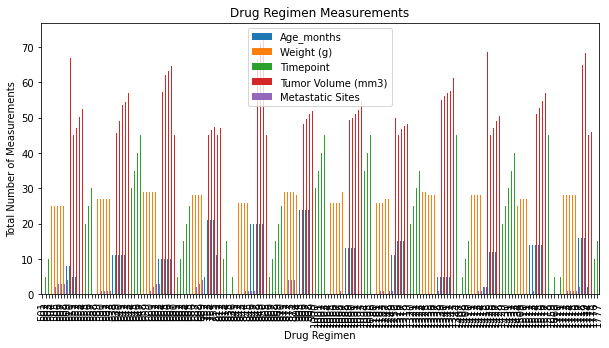

In [41]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_group.plot(kind="bar", figsize=(10,5))

plt.title("Drug Regimen Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

plt.show()


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
 

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
